In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score, confusion_matrix,roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import scikitplot as skplt
from sklearn.metrics import classification_report
import warnings
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
os.chdir("C:/Users/nitin/Documents/MSBA_6420_Predictive Analytics/HW2")

Problem asked to perform the classification based on first considering all the independent variables as ordinal and then by considering them monimal. For Ordinal, our assumption is taking 5more in buyers columns and similar kind of rows to be the exact 5 (value change case by case basis).
Let's first perform nominal classification.

In [2]:
cols = ['buying ','maint','doors','persons','lug_boot','safety','class']
data = pd.read_csv('car.data',header=None,names=cols)

target = data['class']
xes = data.iloc[:,0:6]


# Let's do it considering varibales as ordinal;
maps = {'low':1, 
        'med':2, 
        'high':3, 
        'vhigh':4}
maps2 = {'2':2,'4':4,'3':3,'5more':5}
maps3 = {'2':2,'4':4,'more':5}
maps4 = {'big':3,'small':1,'med':2}
maps5 = {'low':1,'med':2,'high':3}
maps6 = {'unacc':0,'acc':1,'good':2,'vgood':3}
xes['buying '] = xes['buying '].map(maps)
xes['maint'] = xes['maint'].map(maps)
xes['doors'] = xes['doors'].map(maps2)
xes['persons'] = xes['persons'].map(maps3)
xes['lug_boot'] = xes['lug_boot'].map(maps4)
xes['safety'] = xes['safety'].map(maps5)
target = target.map(maps6)

x_train, x_test, y_train, y_test= train_test_split(xes, target, test_size = 0.3)

In [3]:
# Decision Tree

parameters = {'criterion':['entropy','gini'],'max_depth':list(range(1,20))}
clf = tree.DecisionTreeClassifier(random_state=200)
scoring = ['accuracy']
for score in scoring:
    print('Best Model based on',' ' ,score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf,param_grid=parameters, scoring = score, cv=5)
    grid_clf.fit(x_train,y_train)
    print('Best Model found is')
    print(grid_clf.best_estimator_)
    print('*'*100)
    print('Grids tested')
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    for m,s,p in zip(mean_score, std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Best Model based on   accuracy
****************************************************************************************************
Best Model found is
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')
****************************************************************************************************
Grids tested
0.706 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 1}
0.772 (+/-0.013) for {'criterion': 'entropy', 'max_depth': 2}
0.794 (+/-0.029) for {'criterion': 'entropy', 'max_depth': 3}
0.837 (+/-0.020) for {'criterion': 'entropy', 'max_depth': 4}
0.864 (+/-0.008) for {'criterion': 'entropy', 'max_depth': 5}
0.913 (+/-0.032) for {'criterion': 'entropy', 'max_depth': 6}
0.924 (+/-0.027

We have choosen Accuracy as the parameter to evaluate model performance as F1, Precision and Recall would vary for each 
output cases and our primary aim is to correct all of them right than one over other.
Best Model accuracy on traing set is found to be 0.967.
Also checked for testing set, model is performing well in prediction except for class 2 in which it is able to predict 80% of the actuals.
Therefore, based on accuracy the best model found is with depth=11 and gini as criterion and let's fix criterion to be 'gini' and try to visualize hyperparamter tuning and evaluation on testing data.

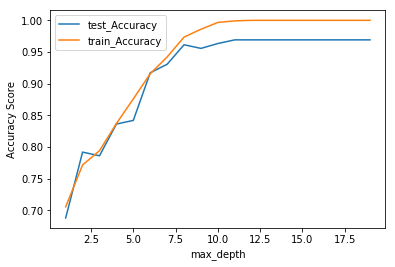

In [4]:
depth = list(range(1,20))

train_accuracy = []

test_accuracy =[]


for i in depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train,clf.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test,clf.predict(x_test)))


# Accuracy Plot
plt.plot(depth, test_accuracy,label='test_Accuracy')
plt.plot(depth, train_accuracy,label='train_Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


looking at the plot depth = 12 seems to be giving highest scores based on above parameters.


Accuracy  0.9730250481695568
[[354   1   2   0]
 [  2 121   4   0]
 [  1   3  16   0]
 [  0   1   0  14]]


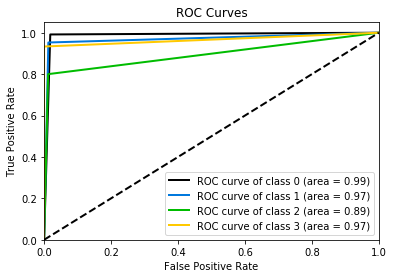

In [6]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=12, random_state=100)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))

skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()  

Overall, accuracy on testing set is 0.97; for class 2 model gave 4 error false predictions.

In [8]:
# KNN Classifier

parameters = {'n_neighbors':list(range(2,10)), 'p':[1,2,3], 'weights':['uniform','distance']}
clf = KNeighborsClassifier()
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='distance')
accuracy  score different hyperparamters
0.884 (+/-0.029) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.883 (+/-0.026) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.884 (+/-0.029) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.883 (+/-0.026) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.884 (+/-0.029) for {'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}
0.883 (+/-0.026) for {'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
0.916 (+/-0.034) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.918 (+/-0.034) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.916 (+/-0.032) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0

Best models accuracy rate on training set is 0.955.
Also checked for testing set, model gave 0.75 and 0.8 recall for class 2 and 3; which is lower.
Therefore, based on accuracy the best model found is with depth=5 and p=1 and let's fix 
p=1 and try to visualize hyperparamter tuning and evaluation on testing data

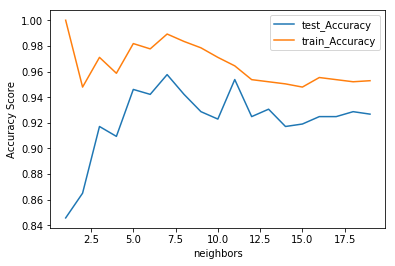

In [9]:
n_neighbors = list(range(1,20))
train_accuracy = []
test_accuracy = []


for i in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors = i, p = 1)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(n_neighbors, test_accuracy,label='test_Accuracy')
plt.plot(n_neighbors, train_accuracy,label='train_Accuracy')
plt.xlabel("neighbors")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


Therfore, we notice that the accuracy is highest when n_neighbors= 7

Accuracy  0.9576107899807321
[[352   4   1   0]
 [  6 119   2   0]
 [  2   4  13   1]
 [  0   2   0  13]]


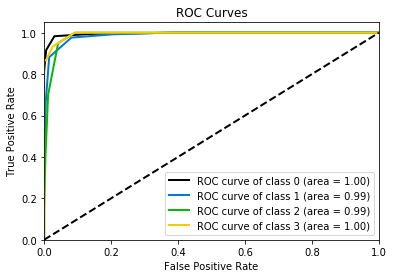

In [11]:
# Now when we know the best parameter
clf = KNeighborsClassifier(n_neighbors = 7, p = 1)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()


Accuracy is about 0.96 and model is giving 4 false cases for case2.

In [12]:
#Logistics Classifier

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty' : ['l1','l2']}
clf = linear_model.LogisticRegression(random_state=100)
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
accuracy  score different hyperparamters
0.706 (+/-0.004) for {'C': 0.001, 'penalty': 'l1'}
0.706 (+/-0.004) for {'C': 0.001, 'penalty': 'l2'}
0.706 (+/-0.004) for {'C': 0.01, 'penalty': 'l1'}
0.709 (+/-0.024) for {'C': 0.01, 'penalty': 'l2'}
0.778 (+/-0.031) for {'C': 0.1, 'penalty': 'l1'}
0.754 (+/-0.044) for {'C': 0.1, 'penalty': 'l2'}
0.818 (+/-0.042) for {'C': 1, 'penalty': 'l1'}
0.791 (+/-0.038) for {'C': 1, 'penalty': 'l2'}
0.831 (+/-0.049) for {'C': 10, 'penalty': 'l1'}
0.815 (+/-0.039) for {'C': 10, 'penalty': 'l2'}
0.833 (+/-0.049) for {'C': 100, 'penalty': 'l1'}
0

Best models accuracy rate on training set is 0.833.
Also checked for testing set, model is performing worst in predicting class 2 and for class 3 & 4, model is wrong 40% of the times.
Therefore, based on accuracy the best model found is with l1 regularization and c=100 penalty level and let's fix 
regularization type and try to visualize hyperparamter tuning and evaluation on testing data.

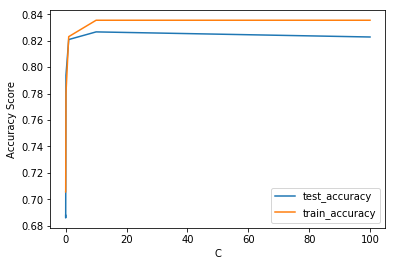

In [13]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []


for i in C:
    clf = linear_model.LogisticRegression(C= i, penalty = 'l1', random_state=100)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()



We notice that model is performing well on both training and testing at C = 10.

Accuracy  0.8265895953757225
[[341  14   2   0]
 [ 48  76   3   0]
 [  4  11   4   1]
 [  0   7   0   8]]


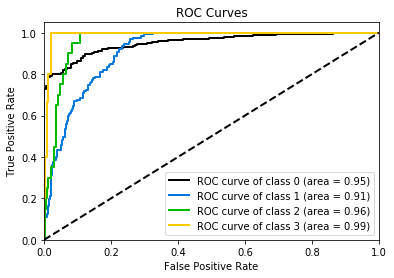

In [14]:
# Now when we know the best parameter
clf = linear_model.LogisticRegression(C= 10, penalty = 'l1', random_state=100)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()

Model is predicting 52 case 1 as wrongly and 9 and 8 wrong predictions for class 2 and 3 respectively. 

In [16]:
# SVM Classifier

parameters = {'C': [ 1, 10], 
              'kernel':['linear', 'rbf']}
clf = SVC(random_state=100)
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=100,
  shrinking=True, tol=0.001, verbose=False)
accuracy  score different hyperparamters
0.873 (+/-0.044) for {'C': 1, 'kernel': 'linear'}
0.956 (+/-0.024) for {'C': 1, 'kernel': 'rbf'}
0.873 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.979 (+/-0.028) for {'C': 10, 'kernel': 'rbf'}
Lets the best model on testing set
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       357
           1       0.97      0.97      0.97       127
           2       0.89      0.85      0.87        20
           3       0

Best models accuracy rate on training set is 0.979.
Also checked for testing set, model is performing quite well in class 2 predictions which other models were not able to; also other classes are also well predicted with recall and precision rates.
Therefore, based on accuracy the best model found is with C=10 (Boundry estimation for soft margin SVM) and rbf (Guassian Kernel) penalty level and let's fix 
kernel type and try to visualize hyperparamter tuning and evaluation on testing data.

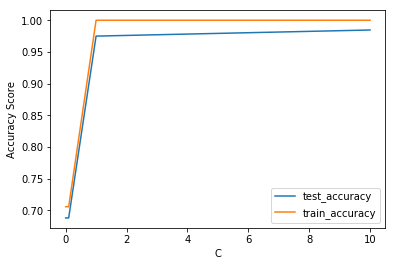

In [17]:
C = [0.001, 0.01, 0.1, 1, 10]
train_accuracy = []

test_accuracy = []


for i in C:
    clf = SVC(C= i, kernel = 'rbf', gamma = 1, random_state=100)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))

    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


Accuracy  0.9845857418111753
[[356   0   1   0]
 [  1 125   0   1]
 [  0   1  18   1]
 [  0   3   0  12]]


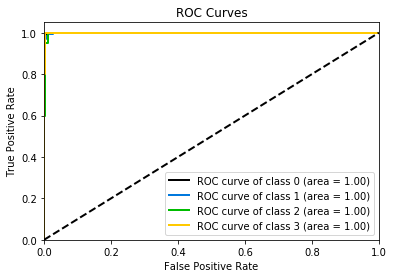

In [18]:
# Now when we know the best parameter
clf = SVC(C= 10, kernel = 'rbf', gamma = 1, random_state=100,probability=True)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()

Overall, accuracy is 0.98 and confusion matrix shows better predictions than any of the previous models.

In [19]:
# Naive Bayes

parameters = {'alpha': [1, 1e-1, 1e-2]}
clf = MultinomialNB()
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
accuracy  score different hyperparamters
0.706 (+/-0.004) for {'alpha': 1}
0.706 (+/-0.004) for {'alpha': 0.1}
0.706 (+/-0.004) for {'alpha': 0.01}
Lets the best model on testing set
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       357
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        15

   micro avg       0.69      0.69      0.69       519
   macro avg       0.17      0.25      0.20       519
weighted avg       0.47      0.69      0.56       519



Best models accuracy rate on training set is 0.7.
Also checked for testing set, model is worst in predicting all the classes. Recall is zero for classes 1 and 2 and 3; therefore, model did not predict even a single right value for these cases.
Therefore, based on accuracy the best model found is with alpha=1; lets visualize hyperparameter tuning.

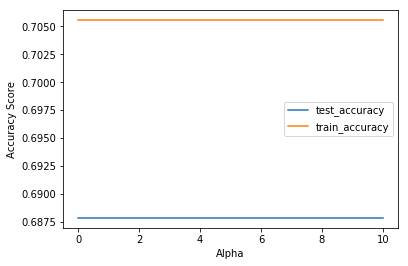

In [20]:
a = [0.001, 0.01, 0.1, 1, 10]
train_accuracy = []

test_accuracy = []


for i in a:
    clf = MultinomialNB(alpha=i)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))

    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("Alpha")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()



Alpha does not seems to be affect any way the model performance.

Accuracy  0.6878612716763006
[[357   0   0   0]
 [127   0   0   0]
 [ 20   0   0   0]
 [ 15   0   0   0]]


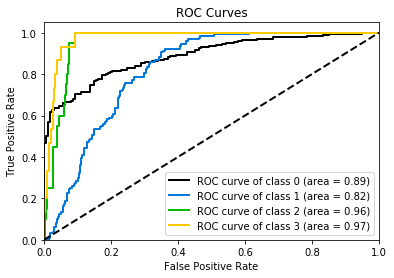

In [21]:
# Now when we know the best parameter
clf = MultinomialNB(alpha=1)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()

Accuracy is about 68% and model correctly predicted all the case 0 but didnt predict any of the other class right.

Therefore, of all the model, SVM outrightly performs the best.

Now, next task is to perform same analysis but this time considering the variables as nominal.

In [22]:
os.chdir("C:/Users/nitin/Documents/MSBA_6420_Predictive Analytics/HW2")


cols = ['buying ','maint','doors','persons','lug_boot','safety','class']
data = pd.read_csv('car.data',header=None,names=cols)

target = data['class']
xes = data.iloc[:,0:6]
target[target=='unacc']=0
target[target=='acc']=1
target[target=='good']=2
target[target=='vgood']=3
target=target.astype('int')
xes = pd.get_dummies(xes)

x_train, x_test, y_train, y_test= train_test_split(xes, target, test_size = 0.3)

In [23]:
# Decision Tree

parameters = {'criterion':['entropy','gini'],'max_depth':list(range(1,20))}
clf = tree.DecisionTreeClassifier(random_state=200)
scoring = ['accuracy']
for score in scoring:
    print('Best Model based on',' ' ,score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf,param_grid=parameters, scoring = score, cv=5)
    grid_clf.fit(x_train,y_train)
    print('Best Model found is')
    print(grid_clf.best_estimator_)
    print('*'*100)
    print('Grids tested')
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    for m,s,p in zip(mean_score, std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Best Model based on   accuracy
****************************************************************************************************
Best Model found is
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')
****************************************************************************************************
Grids tested
0.713 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 1}
0.767 (+/-0.060) for {'criterion': 'entropy', 'max_depth': 2}
0.795 (+/-0.043) for {'criterion': 'entropy', 'max_depth': 3}
0.787 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 4}
0.863 (+/-0.028) for {'criterion': 'entropy', 'max_depth': 5}
0.873 (+/-0.025) for {'criterion': 'entropy', 'max_depth': 6}
0.913 (+/-0.

Best models accuracy rate on training set is 0.962.
Also checked for testing set, model is not good in prediction with class 3 cases.
Therefore, based on accuracy the best model found is with criterion as entropy; lets visualize hyperparameter tuning.

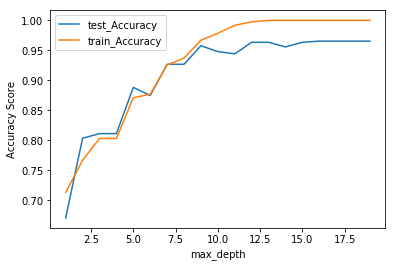

In [24]:

depth = list(range(1,20))

train_accuracy = []

test_accuracy =[]


for i in depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train,clf.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test,clf.predict(x_test)))


# Accuracy Plot
plt.plot(depth, test_accuracy,label='test_Accuracy')
plt.plot(depth, train_accuracy,label='train_Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

looking at the plot depth = 12 seems to be giving highest scores based on above parameters

Accuracy  0.9614643545279383
[[346   2   0   0]
 [ 10 123   0   1]
 [  1   1  16   0]
 [  0   4   1  14]]


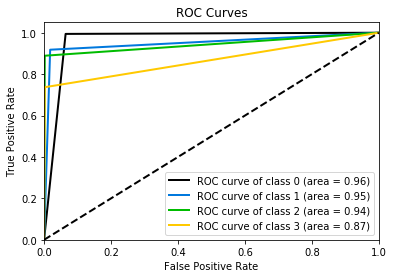

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=13, random_state=100)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))

skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()  

Overall, accuracy is about 0.96. Model wrongly predicted 14 of the 20 class 3 cases. 

In [27]:
# KNN Classifier

parameters = {'n_neighbors':list(range(2,15)), 'p':[1,2,3], 'weights':['uniform','distance']}
clf = KNeighborsClassifier()
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=1,
           weights='distance')
accuracy  score different hyperparamters
0.803 (+/-0.047) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.803 (+/-0.047) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.803 (+/-0.047) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.803 (+/-0.047) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.803 (+/-0.047) for {'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}
0.803 (+/-0.047) for {'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
0.837 (+/-0.036) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.837 (+/-0.036) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.837 (+/-0.036) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0

Best models accuracy rate on training set is 0.9.
Also checked for testing set, model is not good in prediction with class 2 and 3 both.
lets fix p value and weights parameters and again visualize the model performance on training and 
testing sets

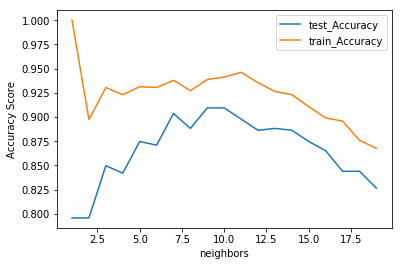

In [30]:
n_neighbors = list(range(1,20))
train_accuracy = []
test_accuracy = []


for i in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors = i, p = 1)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(n_neighbors, test_accuracy,label='test_Accuracy')
plt.plot(n_neighbors, train_accuracy,label='train_Accuracy')
plt.xlabel("neighbors")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

Therfore, we notice that the accuracy is highest when n_neighbors= 9

Accuracy  0.9094412331406551
[[347   1   0   0]
 [ 31 103   0   0]
 [  0   6  11   1]
 [  1   6   1  11]]


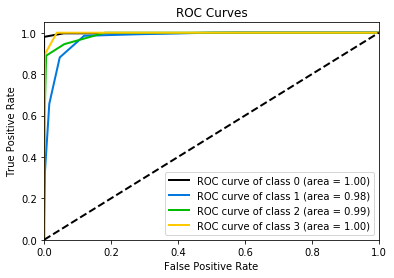

In [31]:
# Now when we know the best parameter
clf = KNeighborsClassifier(n_neighbors = 9, p = 1)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()

Overall, accuracy is about 0.91. Model wrongly predicted 6 of the 20 class 3 cases and 8 of the 20 of the class 2 cases. 

In [32]:
#Logistics Classifier

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty' : ['l1','l2']}
clf = linear_model.LogisticRegression(random_state=100)
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
accuracy  score different hyperparamters
0.713 (+/-0.004) for {'C': 0.001, 'penalty': 'l1'}
0.713 (+/-0.004) for {'C': 0.001, 'penalty': 'l2'}
0.713 (+/-0.004) for {'C': 0.01, 'penalty': 'l1'}
0.713 (+/-0.004) for {'C': 0.01, 'penalty': 'l2'}
0.840 (+/-0.025) for {'C': 0.1, 'penalty': 'l1'}
0.824 (+/-0.044) for {'C': 0.1, 'penalty': 'l2'}
0.878 (+/-0.043) for {'C': 1, 'penalty': 'l1'}
0.870 (+/-0.051) for {'C': 1, 'penalty': 'l2'}
0.888 (+/-0.048) for {'C': 10, 'penalty': 'l1'}
0.888 (+/-0.053) for {'C': 10, 'penalty': 'l2'}
0.888 (+/-0.045) for {'C': 100, 'penalty': 'l1'}
0.

Best models accuracy rate on training set is 0.88.
Also checked for testing set, model is not good in prediction with class 2.
lets fix penalty as l1 value and weights parameters and again visualize the model performance on training and 
testing sets

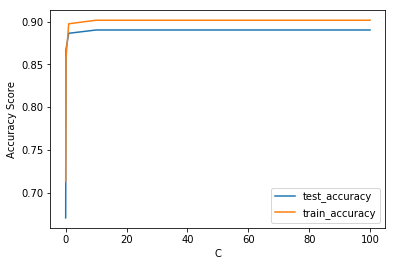

In [34]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []


for i in C:
    clf = linear_model.LogisticRegression(C= i, penalty = 'l1', random_state=100)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))
# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


Accuracy  0.8901734104046243
[[336  12   0   0]
 [ 17 106  10   1]
 [  0  11   6   1]
 [  0   5   0  14]]


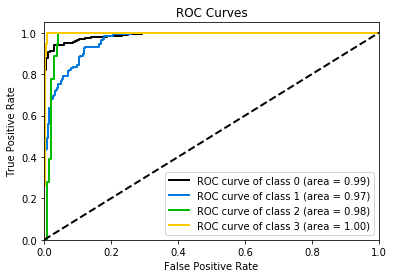

In [35]:
# Therfore, we notice that the accuracy is highest when C=10 with l1 norm penalty

# Now when we know the best parameter
clf = linear_model.LogisticRegression(C= 10, penalty = 'l1', random_state=100)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()

Overall, accuracy is about 0.89. Model wrongly predicted 17 class 2 cases.

In [36]:
# SVM Classifier

parameters = {'C': [ 1, 10], 
              'kernel':['linear', 'rbf']}
clf = SVC(random_state=100)
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=100,
  shrinking=True, tol=0.001, verbose=False)
accuracy  score different hyperparamters
0.922 (+/-0.033) for {'C': 1, 'kernel': 'linear'}
0.880 (+/-0.029) for {'C': 1, 'kernel': 'rbf'}
0.929 (+/-0.047) for {'C': 10, 'kernel': 'linear'}
0.964 (+/-0.034) for {'C': 10, 'kernel': 'rbf'}
Lets the best model on testing set
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       348
           1       0.98      0.98      0.98       134
           2       0.90      1.00      0.95        18
           3       0

Best models accuracy rate on training set is 0.964.
Also checked for testing set, model performs really well for all classes
lets fix gamma value and kernel parameters and again visualize the model performance on training and 
testing sets

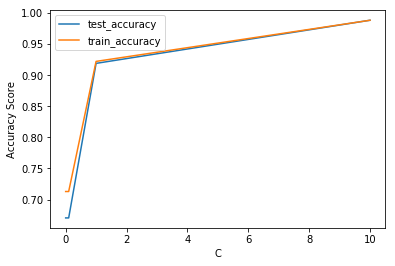

In [37]:
C = [0.001, 0.01, 0.1, 1, 10]
train_accuracy = []

test_accuracy = []


for i in C:
    clf = SVC(C= i, kernel = 'rbf', random_state=100)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))

    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


Accuracy  0.9884393063583815
[[345   3   0   0]
 [  0 131   2   1]
 [  0   0  18   0]
 [  0   0   0  19]]


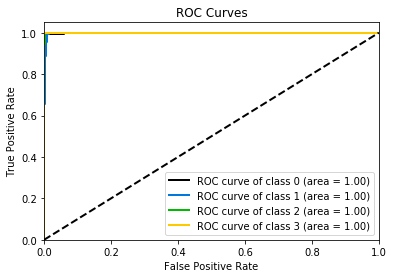

In [38]:
# Now when we know the best parameter
clf = SVC(C= 10, kernel = 'rbf',  random_state=100,probability=True)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()


Overall accuracy is 98.84 and model performs well for all the classes

In [39]:
# Naive Bayes

parameters = {'alpha': [1, 1e-1, 1e-2]}
clf = MultinomialNB()
scoring = ['accuracy']
for score in scoring:
    print('Model Based on ', score)
    print('*'*100)
    
    grid_clf = GridSearchCV(clf, param_grid=parameters, cv=5, scoring = score)
    grid_clf.fit(x_train, y_train)
    print('Best Model with paramters is ')
    print(grid_clf.best_estimator_)
    mean_score = grid_clf.cv_results_['mean_test_score']
    std_score = grid_clf.cv_results_['std_test_score']
    print(score, ' score different hyperparamters')
    for m, s, p in zip(mean_score,std_score, grid_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (m, s * 2, p))
    print('Lets the best model on testing set')
    print('*'*100)
    print(classification_report(y_test, grid_clf.best_estimator_.predict(x_test)))

Model Based on  accuracy
****************************************************************************************************
Best Model with paramters is 
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
accuracy  score different hyperparamters
0.842 (+/-0.048) for {'alpha': 1}
0.849 (+/-0.053) for {'alpha': 0.1}
0.849 (+/-0.053) for {'alpha': 0.01}
Lets the best model on testing set
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       348
           1       0.71      0.57      0.63       134
           2       0.43      0.33      0.38        18
           3       0.88      0.37      0.52        19

   micro avg       0.82      0.82      0.82       519
   macro avg       0.72      0.56      0.61       519
weighted avg       0.81      0.82      0.81       519



Best model from GridSearch has accuracy of 0.849 and model performs worst in testing set for predicting all the classes excet for class 1.

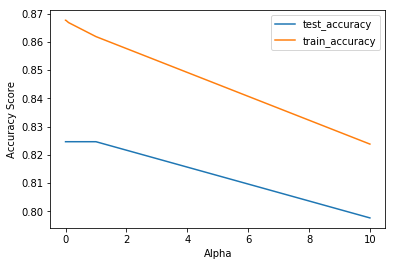

In [40]:

a = [0.001, 0.01, 0.1, 1, 10]
train_accuracy = []

test_accuracy = []


for i in a:
    clf = MultinomialNB(alpha=i)
    clf.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(x_train)))

    test_accuracy.append(accuracy_score(y_test, clf.predict(x_test)))


# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("Alpha")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


Accuracy  0.8246628131021194
[[338  10   0   0]
 [ 49  77   8   0]
 [  1  10   6   1]
 [  0  12   0   7]]


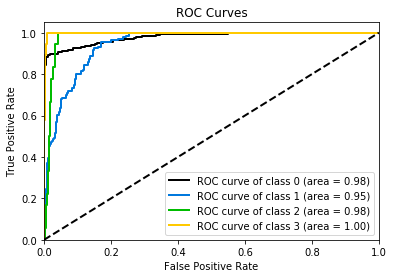

In [41]:
# Now when we know the best parameter
clf = MultinomialNB(alpha=0.1)
clf.fit(x_train, y_train)

print('Accuracy ',accuracy_score(y_test, clf.predict(x_test)))

print(confusion_matrix(y_test, clf.predict(x_test)))


skplt.metrics.plot_roc(y_test, clf.predict_proba(x_test), plot_micro=False, plot_macro=False)

plt.show()

Overall accuracy is about 0.82 and except for class 1 model performs worst for all other cases.
Therefore, out of all the models SVM outperforms in all repsects.

Lets compare all the models now
*******************************

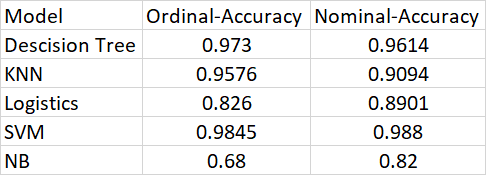

Technically, the independent variables should be considered as ordinal as their values represents order and ranking of points.
KNN works well when varbiables are considered Ordinal as it is based on calculating the distance between points and it would greatly changes if treated in either ways. 
for Decision Tree it does not matter if to use ordinal or nominal encoding; therefore, we can use ordinal as it takes less space in memory and runs faster. NB is giving weaker results with ordinal case as compared to Nominal case; one of the reasons might be if performed with one hot encoding then model is evalauting probabilities for each label separately (as they are in columns now) which is increaisng the performance and complexity of NB classifier.
SVM performs majorly on the same lines as anyways it is giving out best results by taking indpeendent variables into guassian dimensions; hence, minimizing the affect of choosing either nominal or ordinal case.